# 1. Import the required libraries

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense




 # 2. Data Acquisition

In [17]:
# Load the dataset
file_path = 'household_power_consumption.txt'  # Replace with your path

data = pd.read_csv(file_path, sep=';', parse_dates={'datetime': ['Date', 'Time']}, dayfirst=True, low_memory=False, na_values=['nan', '?'])
data.dropna(inplace=True)
data['Global_active_power'] = data['Global_active_power'].astype(float)
data.set_index('datetime', inplace=True)

# Ensure the index is a DatetimeIndex
data.index = pd.to_datetime(data.index)

# Resample data to daily averages
daily_data = data.resample('D').mean()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_data[['Global_active_power']])




# 3. Data Preparation

In [18]:
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Number of past days to use for prediction
X, y = create_sequences(scaled_data, time_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


## 4. Deep Neural Network Architecture


In [19]:


# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 5. Training the model


In [20]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: nan - val_loss: nan
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: nan - val_loss: nan
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: nan - val_loss: nan
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: nan - val_loss: nan
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: nan - val_loss: nan
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: nan - val_loss: nan
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: nan - val_loss: nan
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: nan - val_loss: nan
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: nan - val_loss: nan
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: nan - val_loss: nan
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: nan - val_loss: nan
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: nan - val_loss: nan
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/st

# 6. Test the model


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


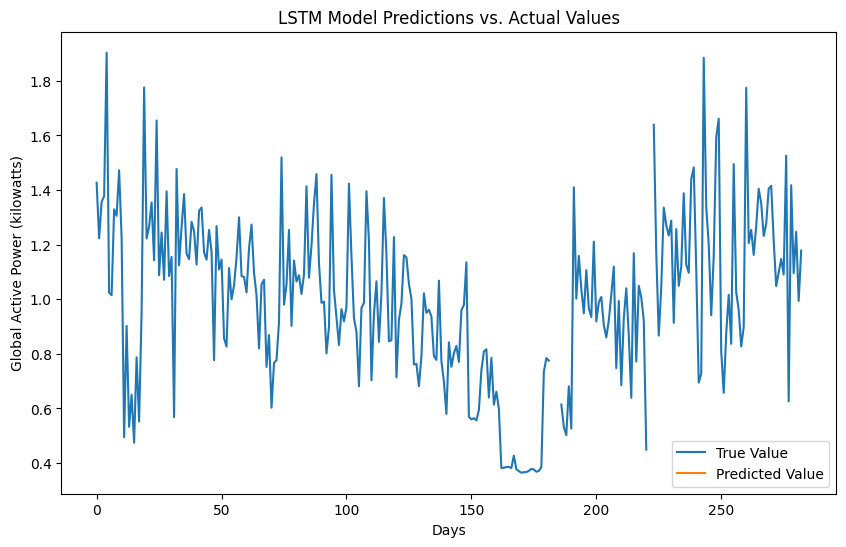

In [21]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

# Plot the predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Predicted Value')
plt.title('LSTM Model Predictions vs. Actual Values')
plt.xlabel('Days')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()


In [22]:
# Check for NaN values in y_test and y_pred
print(f"Number of NaN in y_test: {np.isnan(y_test).sum()}")
print(f"Number of NaN in y_pred: {np.isnan(y_pred).sum()}")
# Reshape y_test and y_pred to ensure correct shape before inverse transforming
y_test = y_test.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

# Inverse transform
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)
# Replace NaN values with 0 (or you can use other strategies)
y_test = np.nan_to_num(y_test)
y_pred = np.nan_to_num(y_pred)

Number of NaN in y_test: 6
Number of NaN in y_pred: 283


# 7. Report the result




In [23]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 3.408237897583166
